# Домашнее задание к лекции "Статистика. Практика"

## Задание 1

Вернемся к [набору данных о видеоиграх](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/vgsales.csv).

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?  
2) Критикам нравятся больше игры на PC или на PS4?  
3) Критикам больше нравятся стрелялки или стратегии?  

Для каждого вопроса:
- сформулируйте нулевую и альтернативную гипотезы;
- выберите пороговый уровень статистической значимости;
- опишите полученные результаты статистического теста.

In [1]:
import pandas as pd
data_path = 'https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/vgsales.csv'
data = pd.read_csv(data_path)
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### 1. Критики относятся к спортивным играм так-же как и к остальным?
    - H0 : sport_score = other_score
    - H1 : sport_score != other_score

>***Примем уровень значимости $\alpha = 0.05$ для данного и последующих тестов***

In [2]:
sports_critic_score = data[data['Genre'] == 'Sports']['Critic_Score'].values
other_critic_score = data[data['Genre'] != 'Sports']['Critic_Score'].values

In [3]:
from scipy import stats
stats.ttest_ind(sports_critic_score, other_critic_score, nan_policy='omit')

Ttest_indResult(statistic=8.084611858252597, pvalue=7.134483681888263e-16)

Оценки спортивных жанров значимо отличаются, от остальных

Визуализируем различия

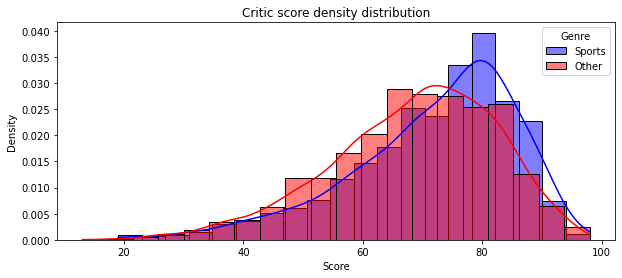

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
sns.histplot(data=sports_critic_score, stat='density', bins=20, color='blue', alpha=0.5, kde=True, label='Sports')
sns.histplot(data=other_critic_score, stat='density', bins=20, color='red', alpha=0.5, kde=True, label='Other')
plt.xlabel('Score')
plt.legend(title='Genre')
plt.title('Critic score density distribution');

**\*** **``density`` normalizes counts so that the area of the histogram is 1**

> На гистограмме мы так же видим, что распределение оценок для спортивных игр смещено вправо, что означает, что в среднем оценки спортивных игр выше, чем остальных.

## 2 Критики ставят оценку вне зависимости от платформы (PC vs PS4)
    - H0: mean_pc_score = mean_ps4_score
    - H1: mean_pc_score != mean_ps4_score

In [5]:
pc_critic_score = data[data['Platform'] == 'PC']['Critic_Score'].values
ps4_critic_score = data[data['Platform'] == 'PS4']['Critic_Score'].values

In [6]:
stats.ttest_ind(pc_critic_score, ps4_critic_score, nan_policy='omit')

Ttest_indResult(statistic=4.544112457929973, pvalue=6.215797831286551e-06)

Оценки значимо различаются в зависимости от платформы, в среднем больше на PS4

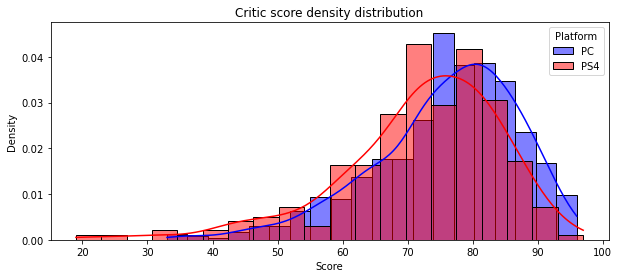

In [7]:
plt.figure(figsize=(10,4))
sns.histplot(data=pc_critic_score, stat='density', bins=20, color='blue', alpha=0.5, kde=True, label='PC')
sns.histplot(data=ps4_critic_score, stat='density', bins=20, color='red', alpha=0.5, kde=True, label='PS4')
# plt.legend(['PC', 'PS4'], label='Platform')
plt.legend(title='Platform')
plt.title('Critic score distribution')
plt.xlabel('Score')
plt.title('Critic score density distribution');

### 3.Критикам нравятся стрелялки и стратегии в равной мере
    - H0: shooter_score = strategy_score 
    - H1: shooter_score != strategy_score

In [8]:
shooter_critic_score = data[data['Genre'] == 'Shooter']['Critic_Score'].values
stratrgy_critic_score = data[data['Genre'] == 'Strategy']['Critic_Score'].values

In [9]:
from scipy import stats
stats.ttest_ind(shooter_critic_score, stratrgy_critic_score, nan_policy='omit')

Ttest_indResult(statistic=-2.06670263948504, pvalue=0.038968713031371977)

Оценки жанров значимо отличаются. Визуализируем различия

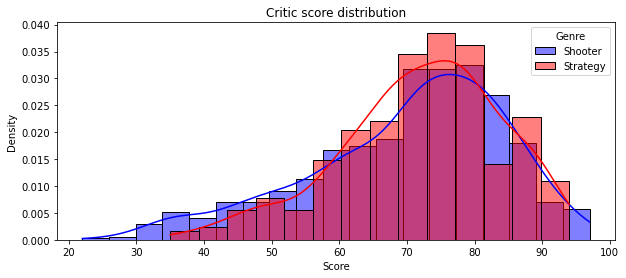

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
sns.histplot(data=shooter_critic_score, stat='density', bins='auto', color='blue', alpha=0.5, kde=True, label='Shooter')
sns.histplot(data=stratrgy_critic_score, stat='density', bins='auto', color='red', alpha=0.5, kde=True, label='Strategy')
plt.legend(title='Genre')
plt.title('Critic score distribution')
plt.xlabel('Score');

Левый хвост у стратегий ниже, следовательно низких оценок меньше. и выше на промежутке ~60-80, что оценок в этом диапазоне больше у стратегий.

Так же мы можем использовать и знак статистики, который можно интерпритировать, как средняя оценка стратегий выше, чем шутеров.<br>
И то, что различия значимы при уровне значимости $\alpha=0.5$ говорит нам `pvalue=0.039` (вероятность получить такие или ещеболее выраженные различия ~0.039=3.9% случайно)

## Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные [здесь](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv)) по признаку спама. Для этого:

1) Привидите весь текст к нижнему регистру;  
2) Удалите мусорные символы;  
3) Удалите стоп-слова;  
4) Привидите все слова к нормальной форме;  
5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:  

```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
```

Можете поэкспериментировать с параметрами [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html);  
6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите `random_state=42`. Используйте [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html);  
7) Постройте модель [логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), укажите `random_state=42`, оцените ее точность на тестовых данных;  
8) Опишите результаты при помощи [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix);  
9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [11]:
message_path = 'https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/spam.csv'
messages = pd.read_csv(message_path)
messages.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
messages['Message'] = messages['Message'].apply(lambda x: x.lower())

In [13]:
import re
messages['Message'] = messages['Message'].apply(lambda message: re.findall(r'\w{2,}', message))

In [14]:
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words('english'))

In [15]:
def without_stop(message):
    new_message = []
    for word in message:
        if word not in stopwords_set:
            new_message.append(word)
    return new_message

In [16]:
messages['Message'] = messages['Message'].apply(without_stop)

In [17]:
# import nltk
# nltk.download('wordnet')

In [18]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lem_mess(message):
    l_m = []
    for word in message:
        l_m.append(wordnet_lemmatizer.lemmatize(word))
    return ' '.join(l_m)

In [19]:
messages['Message'] = messages['Message'].apply(lem_mess)

In [20]:
messages

,Category,Message
0,ham,go jurong point crazy available bugis great wo...
1,ham,ok lar joking wif oni
2,spam,free entry wkly comp win fa cup final tkts 21s...
3,ham,dun say early hor already say
4,ham,nah think go usf life around though
...,...,...
5567,spam,2nd time tried contact 750 pound prize claim e...
5568,ham,going esplanade fr home
5569,ham,pity mood suggestion
5570,ham,guy bitching acted like interested buying some...


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer='char') # При сравнении дает большую точность, чем 'word'
tfidf_matrix = tfidf.fit_transform(messages.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, messages['Category'], train_size=0.7, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()

In [25]:
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [26]:
logistic_regression.score(X_test, y_test)

0.9688995215311005

In [27]:
# dataframe with predicted and real Category
y_pred = logistic_regression.predict(X_test)
pred_real = pd.DataFrame([y_pred, y_test.values], index=['pred', 'real']).T

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
conf_matrix = pd.DataFrame(confusion_matrix(y_test, pred_real['pred']),
                           index=['pred_ham', 'pred_spam'], columns=['true_ham', 'true_spam'])
conf_matrix

,true_ham,true_spam
pred_ham,1441,7
pred_spam,45,179


In [30]:
real_category = pd.DataFrame(y_test).reset_index()
real_category

,index,Category
0,3245,ham
1,944,ham
2,1044,ham
3,2484,ham
4,812,ham
...,...,...
1667,2505,ham
1668,2525,spam
1669,4975,ham
1670,650,spam


In [31]:
real_category['predCategory'] = y_pred

In [32]:
# TEMP c
misstakes = real_category[real_category['Category'] != real_category['predCategory']]
misstakes
misstakes = misstakes[['index', 'predCategory']].merge(messages, how='inner', right_index=True, left_on='index')
misstakes.set_index('index', inplace=True)
misstakes.sort_index()

,predCategory,Category,Message
index,,,
15,ham,spam,xxxmobilemovieclub use credit click wap link n...
68,ham,spam,hear new divorce barbie come ken stuff
139,ham,spam,rcv msg chat svc free hardcore service text go...
191,ham,spam,unique enough find 30th august www areyouuniqu...
227,ham,spam,meet ur dream partner soon ur career flyng sta...
263,spam,ham,luton 0125698789 ring ur around
270,ham,spam,ringtone club get uk single chart mobile week ...
305,ham,spam,sm ac blind date 4u rodds1 21 aberdeen united ...
309,ham,spam,themob check newest selection content game ton...
